# TP6 : Classification de données basée sur models de classification 

- *Abdelhakim Elghayoubi*
- *Master DSBD*
- *2024/2025*

---

## Regression Logistique

In [20]:
# Importation des librairies necessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importation du dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# Affichage des colonnes et des valeurs uniques de la colonne cible
print("Colonnes du dataset :", dataset.columns)
print("Valeurs uniques de 'Purchased' :", dataset["Purchased"].unique())

Colonnes du dataset : Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Valeurs uniques de 'Purchased' : [0 1]


### Q1

In [21]:
# Initialiser les compteurs
count_positive = 0
count_negative = 0

# Parcourir les valeurs de la colonne cible
for value in dataset['Purchased']:
    if value == 1:  # Classe positive
        count_positive += 1
    elif value == 0:  # Classe négative
        count_negative += 1

# Afficher les résultats
print(f"Nombre de classes positives (1) : {count_positive}")
print(f"Nombre de classes négatives (0) : {count_negative}")


Nombre de classes positives (1) : 143
Nombre de classes négatives (0) : 257


In [22]:
# Table croisee pour explorer la relation entre 'Gender' et 'Purchased'
table = pd.crosstab(dataset['Purchased'], dataset['Gender'])
print("Table croisee :\n", table)

Table croisee :
 Gender     Female  Male
Purchased              
0             127   130
1              77    66


In [23]:
# Selection des variables explicatives et de la variable cible
# Ici, 'Age', 'EstimatedSalary', et 'Gender' sont utilisees
X = dataset.iloc[:, [1, 2, 3]].values  # Inclure Gender
y = dataset.iloc[:, -1].values

In [24]:

# Gestion des donnees manquantes
print("Infos sur le dataset :")
dataset.info()  # Verifier si des donnees manquantes existent


Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


### Q2

In [25]:

# Gestion des variables categorique : Encodage de "Gender"
from sklearn.preprocessing import LabelEncoder
labelencoder_gender = LabelEncoder()
dataset['Gender'] = labelencoder_gender.fit_transform(dataset['Gender'])
X[:, 0] = labelencoder_gender.transform(X[:, 0])  # Appliquer l'encodage sur X

In [26]:

# Division du dataset en training set et test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Q3

In [27]:

# Normalisation des donnees avec MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:

# Construction du modele de regression logistique
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Faire des predictions sur le test set
y_pred = classifier.predict(X_test)

In [30]:

# Evaluation du modele avec la matrice de confusion
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

Matrice de confusion :
 [[67  1]
 [10 22]]


In [31]:
# Evaluation des performances
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)
print("ROC AUC :", roc_auc)

Accuracy : 0.89
Precision : 0.9565217391304348
Recall : 0.6875
F1 Score : 0.8
ROC AUC : 0.8363970588235294


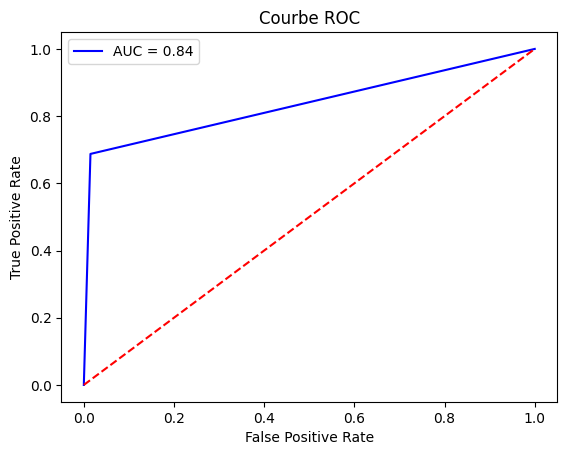

In [32]:
# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, "b", label="AUC = %.2f" % roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.title("Courbe ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [33]:


# Validation croisee
from sklearn.model_selection import cross_val_score
modelCV = LogisticRegression()
cross_val_scores = cross_val_score(modelCV, X_train, y_train, cv=5)
print("Scores de validation croisee :", cross_val_scores)
print("Score moyen :", cross_val_scores.mean())

Scores de validation croisee : [0.78333333 0.76666667 0.71666667 0.85       0.9       ]
Score moyen : 0.8033333333333333


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6840\4257009175.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],


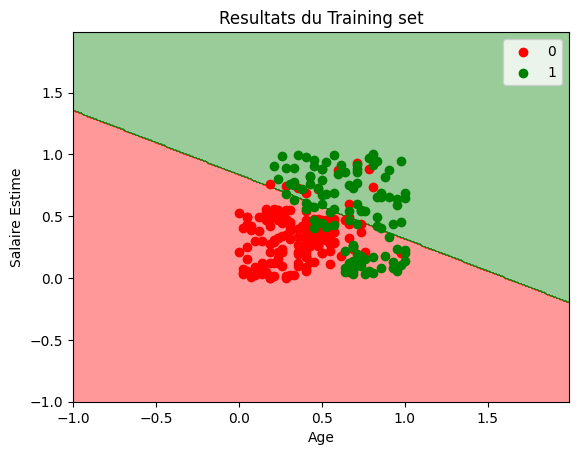

In [34]:
# Visualisation des resultats
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 2].min() - 1, stop=X_set[:, 2].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), X1.ravel()]).T).reshape(X1.shape),
             alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 2],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Resultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estime')
plt.legend()
plt.show()


### Ex2

## KNN

### Ex1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn import metrics

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

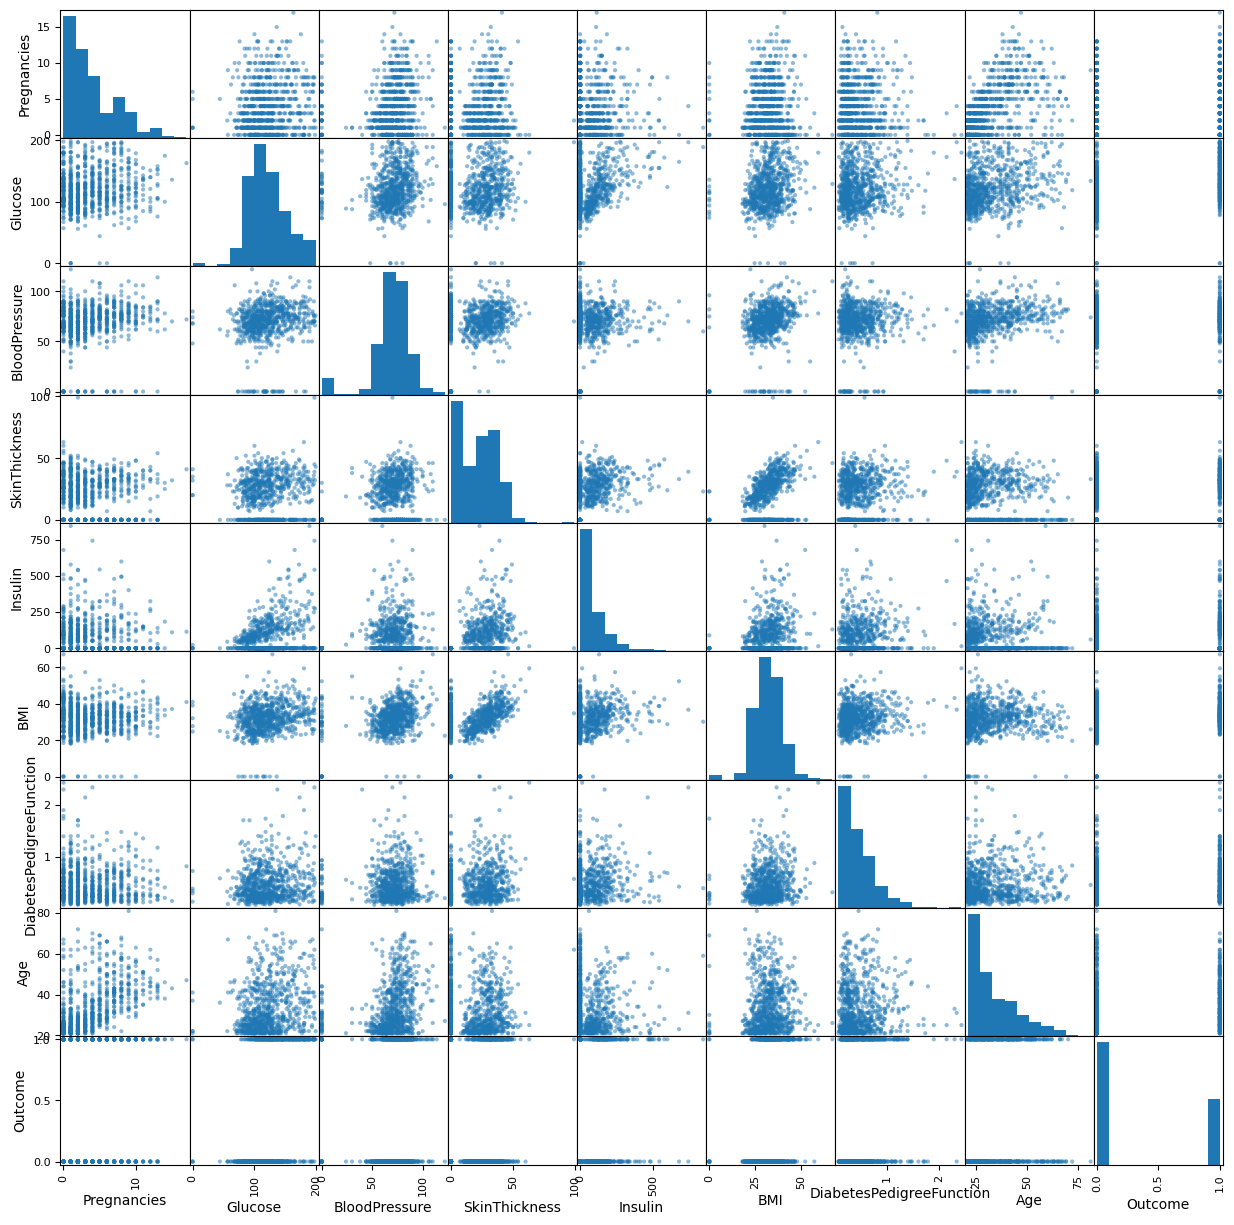

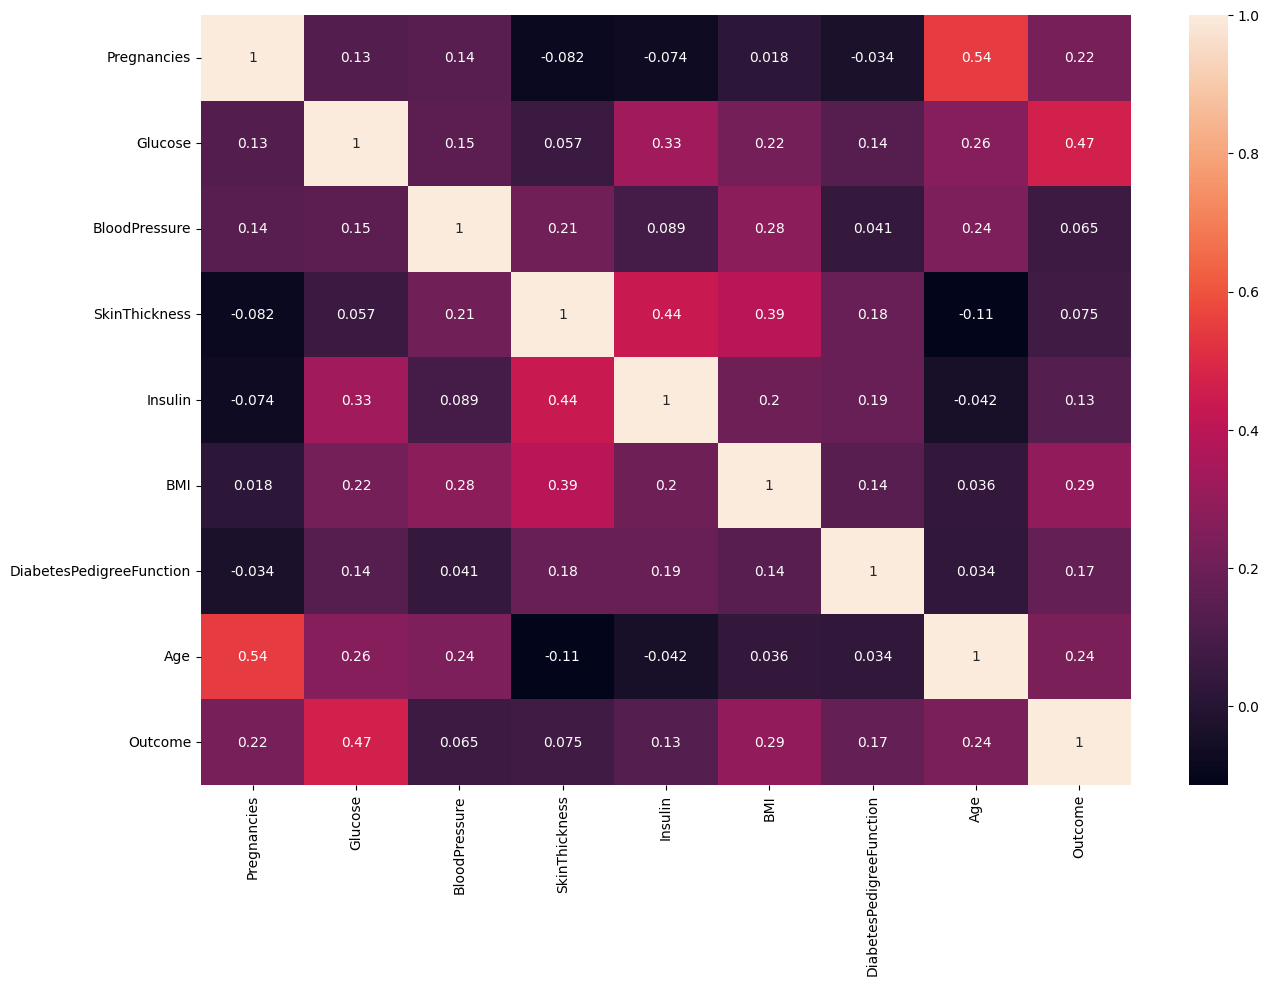

In [3]:
# Plot scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 15))

# Plot heatmap of correlations
plt.figure(figsize=(15, 10))
sn.heatmap(df.corr(), annot=True)

In [4]:
# Split the dataset into features and target variable
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [5]:

# Normalize and Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Balance Imbalanced Data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [7]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize KNN with distance weighting
knn = KNeighborsClassifier(n_neighbors=13, weights='distance')

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [8]:
# Make predictions
y_pred = knn.predict(X_test)

In [9]:
# Evaluate the model
mx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", mx)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[ 98  51]
 [ 22 129]]
Accuracy: 0.7566666666666667
Precision: 0.7166666666666667
Recall: 0.8543046357615894
F1 Score: 0.7794561933534743


In [10]:
# Find the best K value
acc = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance').fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

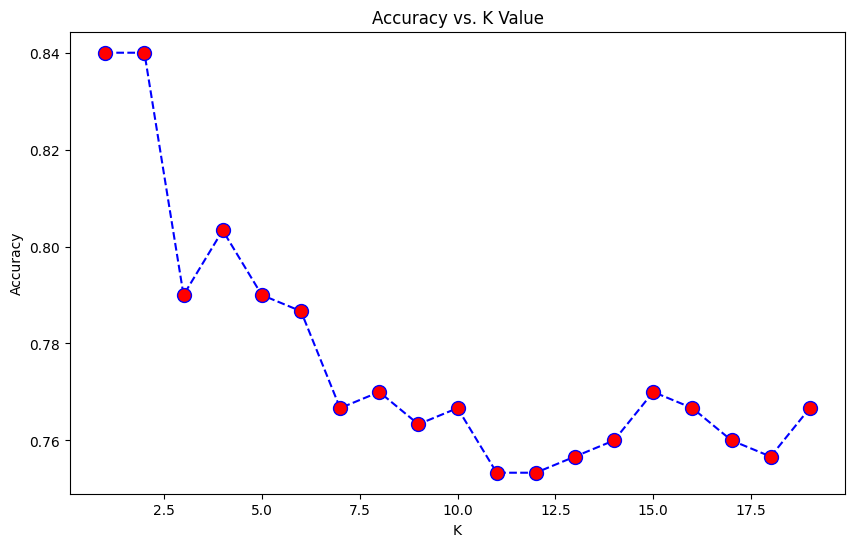

In [11]:
# Plot accuracy vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Ex2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

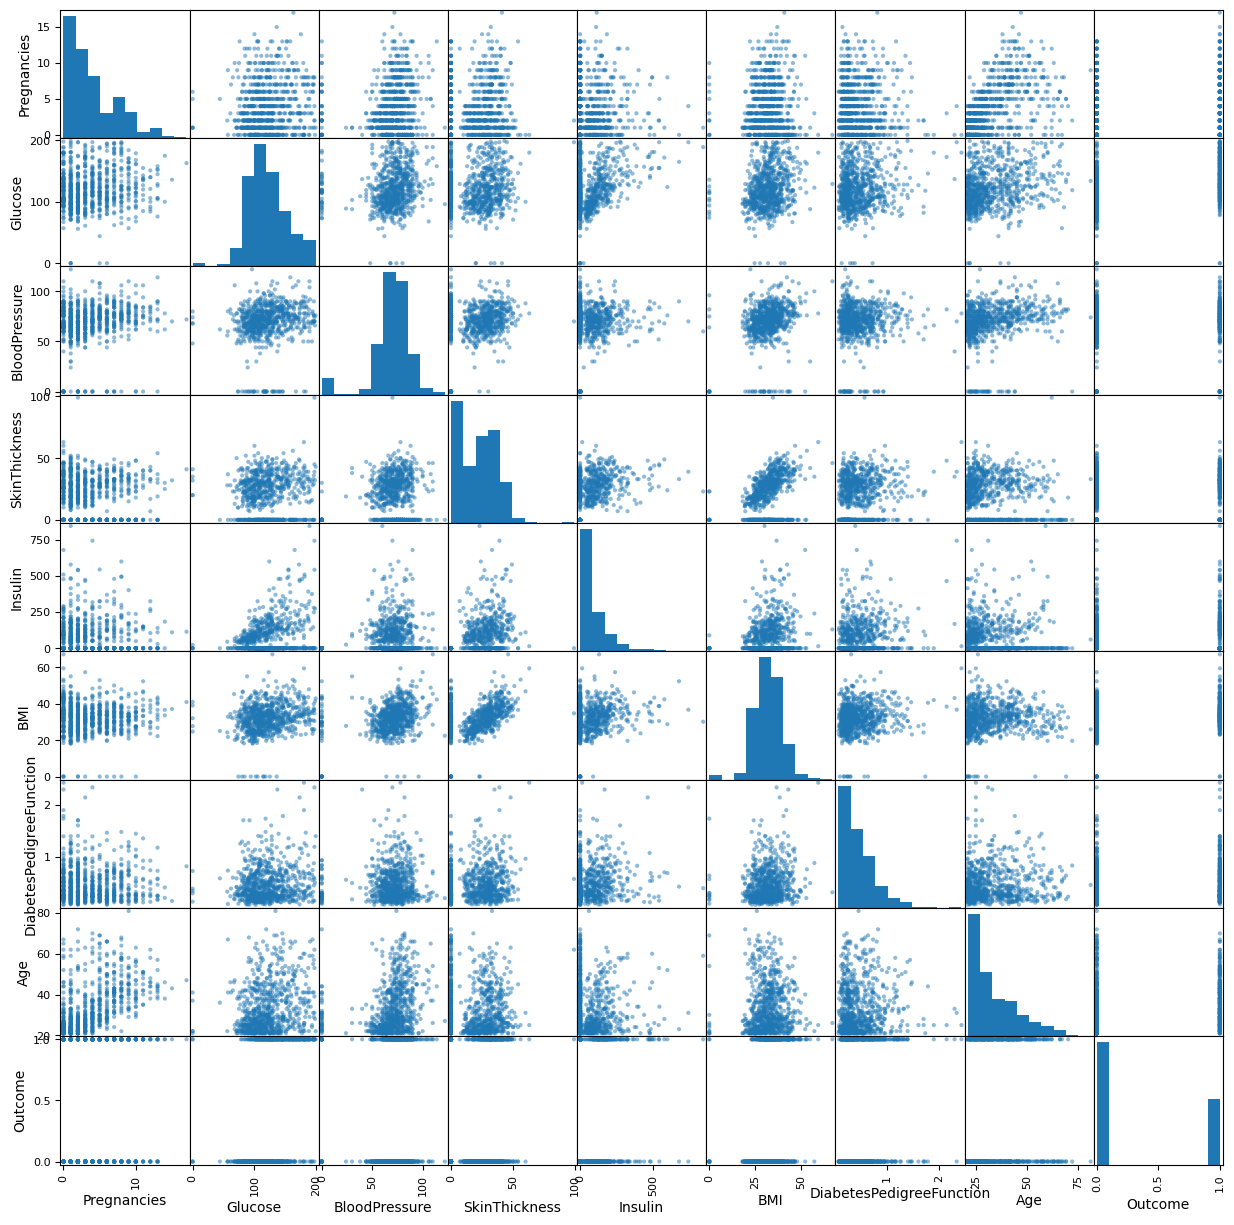

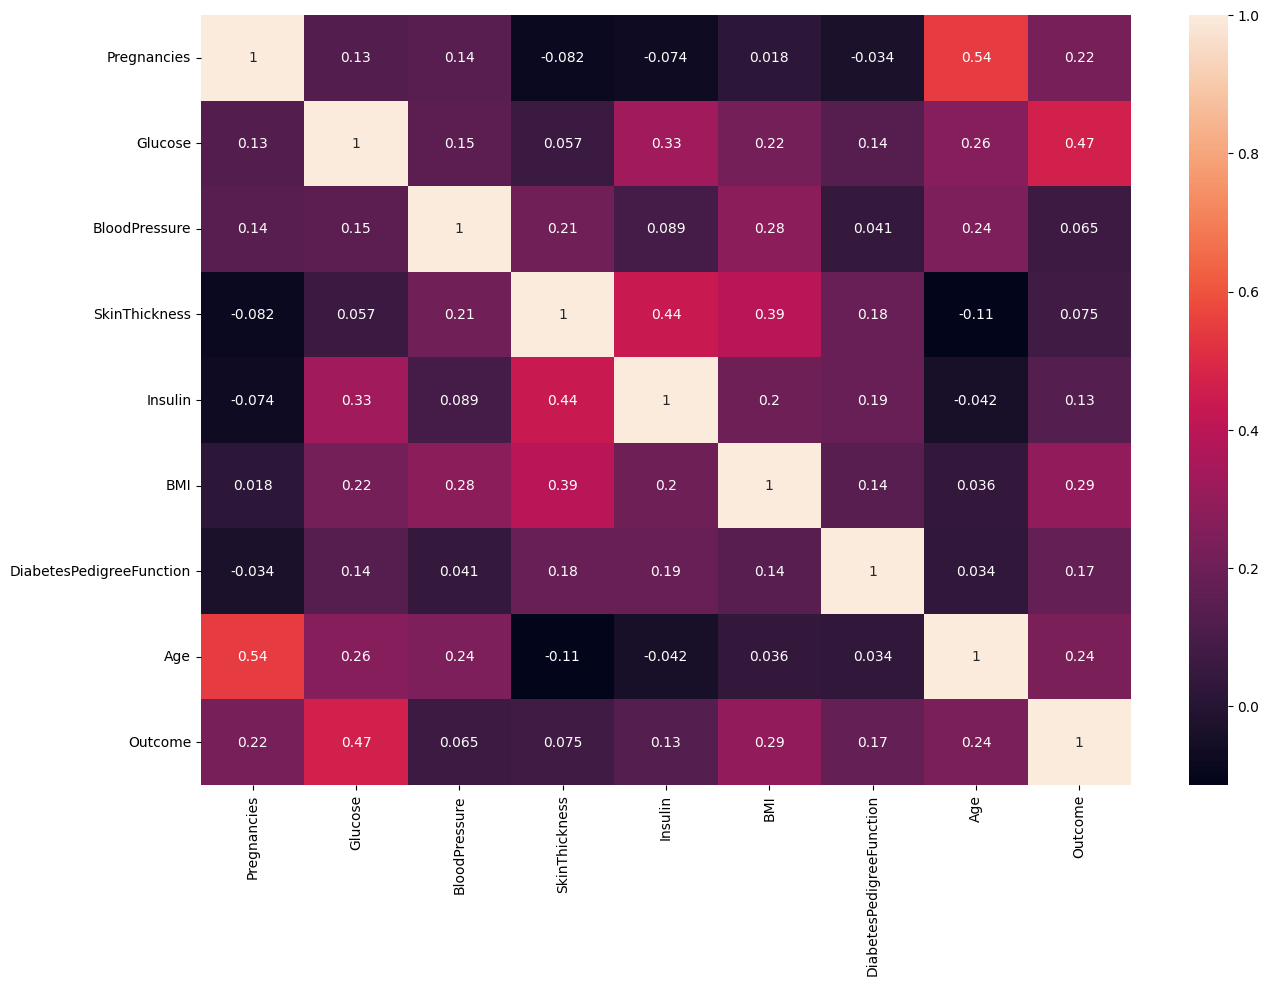

In [14]:
# Plot scatter matrix
pd.plotting.scatter_matrix(df, figsize=(15, 15))

# Plot heatmap of correlations
plt.figure(figsize=(15, 10))
sn.heatmap(df.corr(), annot=True)

In [15]:
# Split the dataset into features and target variable
X = df.drop('Age', axis=1).values
y = df['Age'].values

# Normalize and Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize KNN Regressor with distance weighting
knn = KNeighborsRegressor(n_neighbors=13, weights='distance')

# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13, weights='distance')

In [17]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 6.6650362895787145
Mean Squared Error (MSE): 95.25594967204961
R-squared (R2): 0.32995931861511874


In [18]:
# Find the best K value
mae = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance').fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae.append(mean_absolute_error(y_test, y_pred))

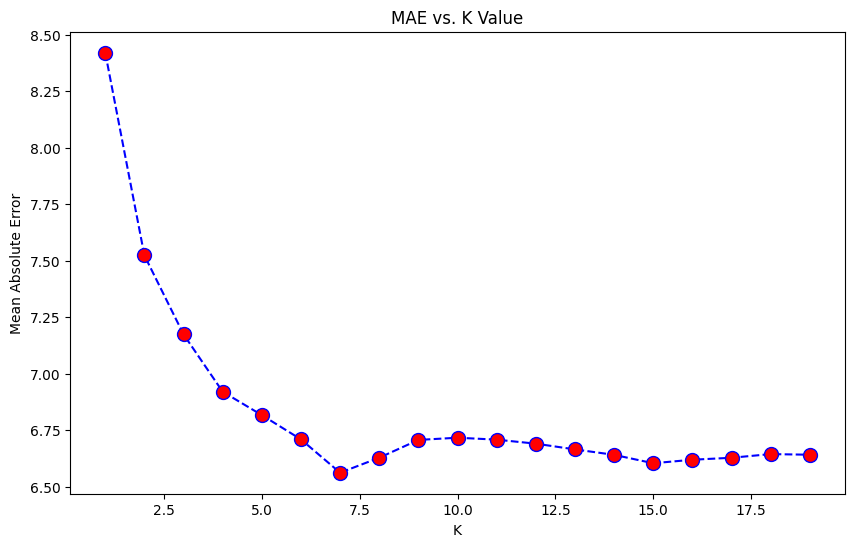

In [19]:
# Plot MAE vs. K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), mae, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('MAE vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.show()

## Naive Bayes

In [35]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
# Charger le dataset Iris
iris = load_iris()
X = iris.data  
y = iris.target  
target_names = iris.target_names

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisation avec MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Division des données normalisées en ensemble d'entraînement et de test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle Naive Bayes avec données normalisées
model_scaled = GaussianNB()
model_scaled.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test normalisé
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Évaluation
print("Rapport de classification (avec MinMaxScaler) :")
print(classification_report(y_test, y_pred_scaled, target_names=target_names))


Rapport de classification (avec MinMaxScaler) :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Rapport de classification (avec 2 caractéristiques) :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



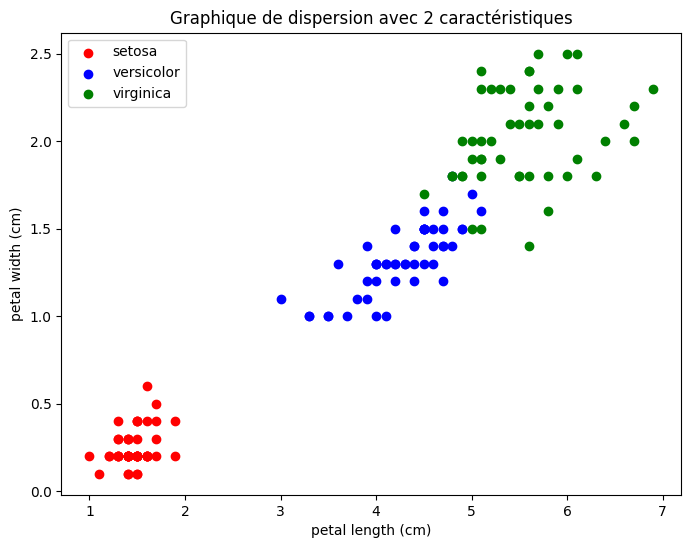

In [40]:
# Sélection de deux caractéristiques
X_reduced = X[:, [2, 3]]  # Longueur et largeur des pétales

# Division des données avec seulement deux caractéristiques
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle
model_reduced = GaussianNB()
model_reduced.fit(X_train_reduced, y_train)

# Prédictions sur l'ensemble de test
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Évaluation
print("Rapport de classification (avec 2 caractéristiques) :")
print(classification_report(y_test, y_pred_reduced, target_names=target_names))

# Création d'un DataFrame pour la visualisation
df_reduced = pd.DataFrame(X_reduced, columns=[iris.feature_names[2], iris.feature_names[3]])
df_reduced['species'] = y

# Visualisation des données réduites
plt.figure(figsize=(8, 6))
for species, color in zip(range(3), ['red', 'blue', 'green']):
    subset = df_reduced[df_reduced['species'] == species]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], label=target_names[species], color=color)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Graphique de dispersion avec 2 caractéristiques")
plt.legend()
plt.show()


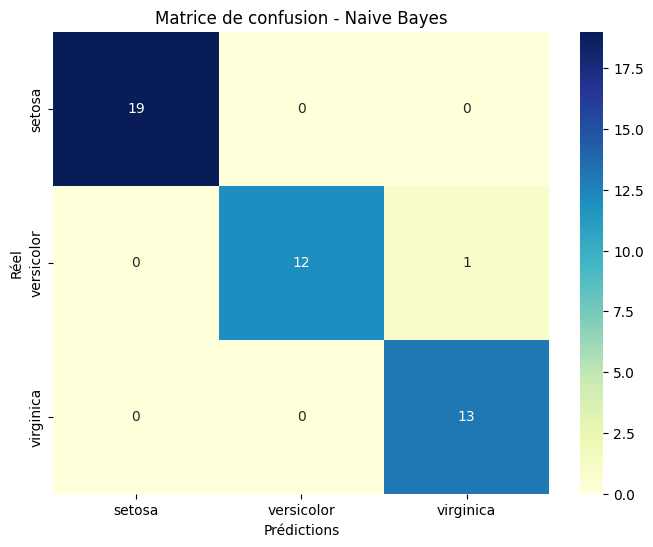

In [41]:
# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Naive Bayes")
plt.show()